In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [109]:
dataset = []
volumen = 100
separator = np.array([-2,3,-4])
noise = 5

for i in range(volumen):
  new_vec = np.random.rand(2)*10

  if separator.dot(np.append(new_vec,1)) > 0:
    new_label= 1
  else:
    new_label = 0
  
  if noise:
    noise_vec = np.random.rand(2) - np.array([0.5,0.5])
    norm = np.linalg.norm(new_vec)
    noise_vec = noise_vec*noise/norm
    new_vec += noise_vec

  dataset.append(np.append(new_vec,new_label))


In [111]:
df = pd.DataFrame(dataset)
df = df.rename(columns={0:"x",1:"y",2:"target"})
df

,x,y,target
0,3.485228,1.732756,0.0
1,-0.018314,2.709511,1.0
2,-0.582693,3.902425,1.0
3,5.724784,4.662014,0.0
4,1.060584,7.125074,1.0
...,...,...,...
95,3.617818,0.325884,0.0
96,9.040046,7.773802,1.0
97,9.052227,0.868447,0.0
98,-0.246287,6.152411,1.0


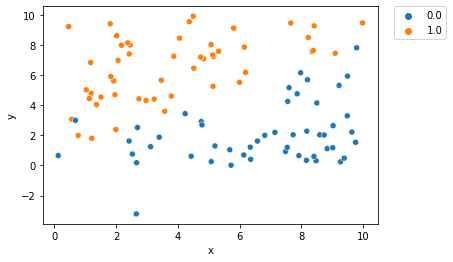

In [ ]:
sns.scatterplot(x=df["x"],y=df["y"],hue=df["target"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [134]:
class Perceptron():

  def __init__(cls,dimention):
    cls.dim = dimention
    cls.weights = np.random.rand(dimention+1)
    cls.gamma = 0.1
  
  def train(cls,x_train,y_train):
    
    iterations = 0
    fails = 0

    for features,label in zip(x_train,y_train):

      features = np.append(features,1)
      delta = label - cls.__activation_(features)
      delta = delta*features*cls.gamma
      cls.weights += delta

      if not delta:
        fails +=1
      iterations += 1

  def __activation_(cls,x_vec):
    return 1 if cls.weights.dot(x_vec) > 0 else 0
  
  def predict(cls,x_vec):
    return cls.__activation_(np.append(x_vec,1))

In [127]:
x_train,y_train = [],[]
for data in dataset:
  x_train.append(np.array([data[0],data[1]]))
  y_train.append(data[2])

x_train[0]


array([3.48522822, 1.73275623])

In [137]:
my_perceptron = Perceptron(2)
my_perceptron.train(x_train,y_train)

0

In [148]:
# Testing the perceptron

volumen_test = 1000
separator = np.array([-2,3,-4]) #we already know it cause we made the train set

test_set = []

for i in range(volumen_test):
  x_test = np.random.rand(2)*10
  prediction = my_perceptron.predict(x_test)

  if separator.dot(np.append(x_test,1)) > 0:
    label = 1
  else:
    label = 0

  x_test = np.append(x_test,[label,prediction])
  test_set.append(x_test) 

  
  

In [164]:
results = pd.DataFrame(test_set)
results = results.rename(columns={0:"x",1:"y",2:"label",3:"predicted"})
results

,x,y,label,predicted
0,6.404933,2.900076,0.0,0.0
1,9.781966,2.361044,0.0,0.0
2,9.983948,0.495283,0.0,0.0
3,5.342412,8.758603,1.0,1.0
4,6.490413,6.403839,1.0,1.0
...,...,...,...,...
995,2.044267,6.399785,1.0,1.0
996,0.258103,1.483697,0.0,1.0
997,8.362586,0.562258,0.0,0.0
998,4.666926,3.361989,0.0,0.0


In [165]:
results["ok"] =  results["label"] == results["predicted"]

In [169]:
results

,x,y,label,predicted,ok
0,6.404933,2.900076,0.0,0.0,True
1,9.781966,2.361044,0.0,0.0,True
2,9.983948,0.495283,0.0,0.0,True
3,5.342412,8.758603,1.0,1.0,True
4,6.490413,6.403839,1.0,1.0,True
...,...,...,...,...,...
995,2.044267,6.399785,1.0,1.0,True
996,0.258103,1.483697,0.0,1.0,False
997,8.362586,0.562258,0.0,0.0,True
998,4.666926,3.361989,0.0,0.0,True


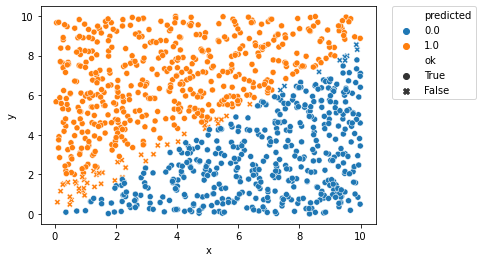

In [175]:
sns.scatterplot(data=results, x="x",y="y",hue="predicted",style = "ok",style_order=[True,False])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()





In [163]:
results["ok"]  

,x,y,label,predicted
0,6.404933,2.900076,0.0,0.0
1,9.781966,2.361044,0.0,0.0
2,9.983948,0.495283,0.0,0.0
3,5.342412,8.758603,1.0,1.0
4,6.490413,6.403839,1.0,1.0
...,...,...,...,...
994,6.356450,1.035544,0.0,0.0
995,2.044267,6.399785,1.0,1.0
997,8.362586,0.562258,0.0,0.0
998,4.666926,3.361989,0.0,0.0
